In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np

import datetime

import matplotlib
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
today = enddate = datetime.date.today()
startdate = enddate - datetime.timedelta(days=240)# datetime.date(2006, 1, 1)
asset = 'AAPL'

In [3]:
# Spec: Stock data should be pulled from finance.yahoo
ticker = data.DataReader(asset, data_source='yahoo', start=startdate, end=enddate)
print(ticker.head())

# Add a new version of the date index for plotting
# convert the datetime64 column in the dataframe to 'float days'
ticker['NumDate'] = mdates.date2num(ticker.index.to_pydatetime())
ticker = ticker.dropna()

                 Open        High        Low      Close    Volume  Adj Close
Date                                                                        
2016-05-31  99.599998  100.400002  98.820000  99.860001  42307200  98.814618
2016-06-01  99.019997   99.540001  98.330002  98.459999  29173300  97.429272
2016-06-02  97.599998   97.839996  96.629997  97.720001  40191600  96.697021
2016-06-03  97.790001   98.269997  97.449997  97.919998  28062900  96.894924
2016-06-06  97.989998  101.889999  97.550003  98.629997  23292500  97.597491


In [4]:
ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate
Date,,,,,,,
2017-01-17,118.339996,120.239998,118.220001,120.000000,34078600,120.000000,736346
2017-01-18,120.000000,120.500000,119.709999,119.989998,23644700,119.989998,736347
2017-01-19,119.400002,120.089996,119.370003,119.779999,25295700,119.779999,736348
2017-01-20,120.449997,120.449997,119.730003,120.000000,29479900,120.000000,736349
2017-01-23,120.000000,120.809998,119.769997,120.080002,21131400,120.080002,736352


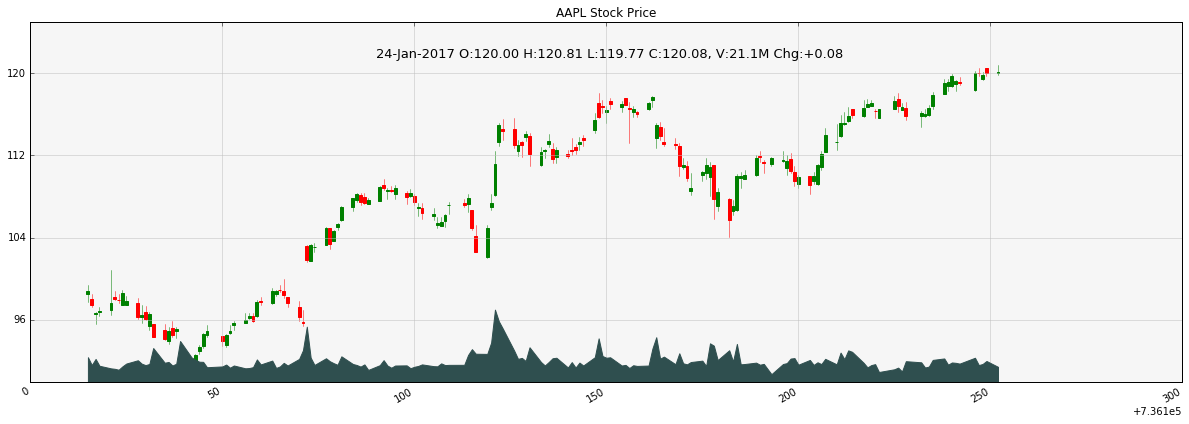

In [5]:
# First we plot our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
# rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
# ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t: # , ax3 #ax1, 
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
# ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [6]:
# Spec: Each step in calculations of the technical indicators should be explicitly shown
# Define the indicator using functions:

# RSI: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:relative_strength_index_rsi
# 1. Gain
# 2. Loss
# 3. Average Gain
# 4. Average Loss
# 5. RS: Average Gain / Average Loss
# 6. RSI = 100 - (100/(1+RS))

def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

def wilder_sum(s, n):
    s = s.dropna()

    nf = (n - 1) / n
    ws = [np.nan]*(n - 1) + [s[n - 1] + nf*sum(s[:n - 1])]

    for v in s[n:]:
        ws.append(v + ws[-1]*nf)

    return pd.Series(ws, index=s.index)

def gain(ticker):
    delta = (ticker["Adj Close"] - ticker.shift(1)["Adj Close"])
    gain = delta * (delta > 0)
    return gain

def loss(ticker):
    delta = (ticker["Adj Close"] - ticker.shift(1)["Adj Close"])
    loss = delta * (delta < 0) * -1
    return loss

def average_gain(ticker, n=14):
    # average_gain = moving_average(ticker["Gain"], n=n, type="exponential")
    average_gain = wilder_sum(ticker["Gain"], n=n)
    return average_gain

def average_loss(ticker, n=14):
    # average_loss = moving_average(ticker["Loss"], n=n, type="exponential")
    average_loss = wilder_sum(ticker["Loss"], n=n)
    return average_loss

def rs(ticker):
    rs = ticker["Average Gain"] / ticker["Average Loss"]
    return rs

def rsi(ticker):
    # 100 - (100/(1+RS))
    rsi = 100 - (100/(1 + ticker["RS"]))
    return rsi


In [7]:
# Spec: Each calculation should be manifested in Pandas dataframes
# Define the indicator parameters for simulation
n = 14
overbought_level = 70
oversold_level = 30

# Compute the indicator values (intermediate and final)
# Add indicator values to DataFrame
ticker["Gain"] = gain(ticker)
ticker["Loss"] = loss(ticker)

ticker["Average Gain"] = average_gain(ticker, n=n)
ticker["Average Loss"] = average_loss(ticker, n=n)

ticker["RS"] = rs(ticker)

ticker["RSI"] = rsi(ticker)

ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate,Gain,Loss,Average Gain,Average Loss,RS,RSI
Date,,,,,,,,,,,,,
2017-01-17,118.339996,120.239998,118.220001,120.000000,34078600,120.000000,736346,0.959999,-0.000000,6.254542,2.585042,2.419512,70.756064
2017-01-18,120.000000,120.500000,119.709999,119.989998,23644700,119.989998,736347,-0.000000,0.010002,5.807789,2.410399,2.409472,70.669950
2017-01-19,119.400002,120.089996,119.370003,119.779999,25295700,119.779999,736348,-0.000000,0.209999,5.392947,2.448226,2.202798,68.777297
2017-01-20,120.449997,120.449997,119.730003,120.000000,29479900,120.000000,736349,0.220001,-0.000000,5.227737,2.273353,2.299571,69.693034
2017-01-23,120.000000,120.809998,119.769997,120.080002,21131400,120.080002,736352,0.080002,-0.000000,4.934330,2.110971,2.337470,70.037181


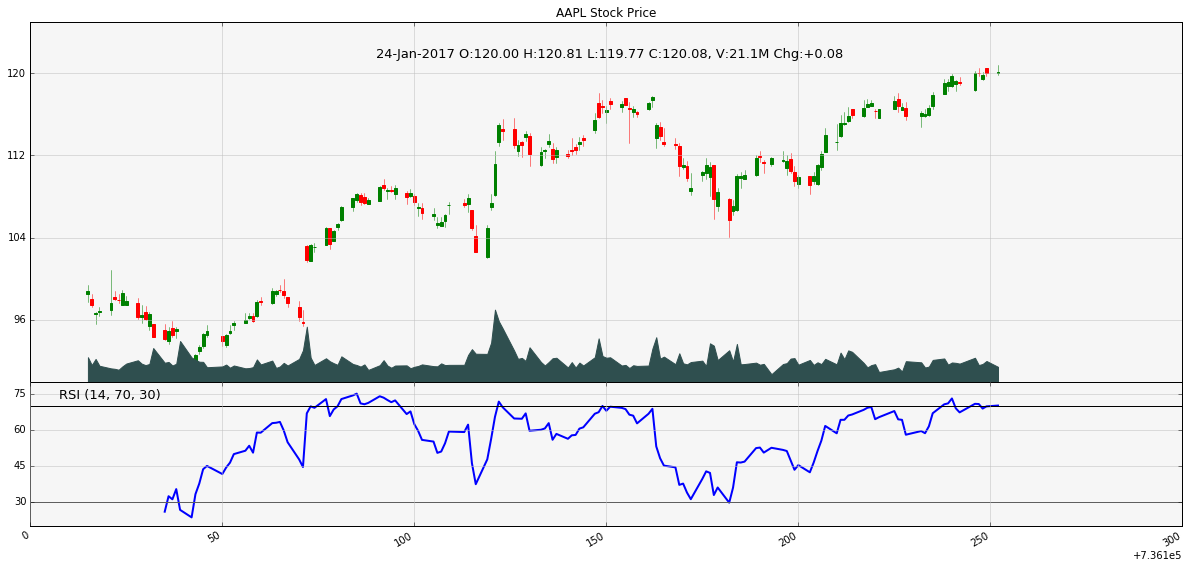

In [8]:
# Next we plot the indicator against our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["RSI"], color='blue', lw=2) 
ax3.axhline(y=overbought_level, color='black', lw=1)
ax3.axhline(y=oversold_level, color='black', lw=1)

ax3.text(0.025, 0.95, 'RSI (%d, %d, %d)' % (n, overbought_level, oversold_level), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [9]:
# Here we will define the strategy to be tested: long-only RSI
# The strategy is composed of:
#    Outlook: whether the market is bullish, bearish, or neutral
#    Signal: the order to buy or sell

# Spec: Each indicator should have a bullish and bearish entry and exit rules clearly defined
# Define how signals are calculated
def define_outlook(ticker):
    # Default to Hold signal (other options are Buy or Sell)
    ticker["Outlook"] = "Neutral"
    # For now, signal on every crossover. Could be more specific if preferred
    ticker.loc[ticker["RSI"] < oversold_level,"Outlook"] = "Bull"
    ticker.loc[ticker["RSI"] > overbought_level,"Outlook"] = "Bear"
    
    # Shift the signal by 1 day to avoid look-ahead bias
    ticker.loc[:,"Outlook"] = ticker["Outlook"].shift().fillna("Neutral")
    
    return ticker

# Define how outlook is turned into trade recommendations
def define_signal(ticker):
    # Recode Bull=1, Bear=-1, Neutral=0
    outlook_temp = ticker["Outlook"].replace("Bull",1)
    outlook_temp = outlook_temp.replace("Bear",-1)
    outlook_temp = outlook_temp.replace("Neutral",0)
    trades = outlook_temp.diff().fillna(0)
    # define how trades should happen based on the signal given
    ticker.loc[trades > 0,"Trade"] = "Buy"
    ticker.loc[trades < 0, "Trade"] = "Sell"
    ticker["Trade"] = ticker["Trade"].fillna("Hold")
    return ticker
    
    
# Translate indicator values into bullish/bearish signals
ticker = define_outlook(ticker)
ticker = define_signal(ticker)

ticker.head()

,Open,High,Low,Close,Volume,Adj Close,NumDate,Gain,Loss,Average Gain,Average Loss,RS,RSI,Outlook,Trade
Date,,,,,,,,,,,,,,,
2016-05-31,99.599998,100.400002,98.820000,99.860001,42307200,98.814618,736115,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Hold
2016-06-01,99.019997,99.540001,98.330002,98.459999,29173300,97.429272,736116,-0.000000,1.385346,NaN,NaN,NaN,NaN,Neutral,Hold
2016-06-02,97.599998,97.839996,96.629997,97.720001,40191600,96.697021,736117,-0.000000,0.732251,NaN,NaN,NaN,NaN,Neutral,Hold
2016-06-03,97.790001,98.269997,97.449997,97.919998,28062900,96.894924,736118,0.197903,-0.000000,NaN,NaN,NaN,NaN,Neutral,Hold
2016-06-06,97.989998,101.889999,97.550003,98.629997,23292500,97.597491,736121,0.702567,-0.000000,NaN,NaN,NaN,NaN,Neutral,Hold


In [10]:
# And finanlly we test the strategy's performance

# Spec: The trading strategy
#    - the starting capital is $100K
#    - Once the indicator flashes a buy signal, the entire capital is invested into the stock
#    - Once the indicator gets into a sell mode, the trade is exited
#    - No transaction fee assumption applies
starting_capital = 100000
# Currently assuming everything is long-only
long_only = True
# Have to use Adjusted Close for accounting due to splits
returns = pd.DataFrame({"Price":ticker["Adj Close"],
                       "Outlook":ticker["Outlook"],
                        "Trade":ticker["Trade"]
                       })


returns["Asset"] = 0
returns.loc[returns["Trade"]=="Buy","Asset"] = 1
returns.loc[returns["Trade"]=="Hold","Asset"] = np.nan
returns["Asset"] = returns["Asset"].ffill().fillna(0)


returns.loc[(returns["Trade"] == "Buy") & (returns["Asset"].shift() == 0), "Trade_Type"] = "Entry"
returns.loc[(returns["Trade"] == "Sell") & (returns["Asset"].shift() == 1), "Trade_Type"] = "Exit"
# Also will introduce short and cover when shorting is introduced

returns["Asset_Returns"] = returns["Price"].pct_change().fillna(0)
returns["Portfolio_Returns"] = returns["Asset_Returns"] * returns["Asset"]
returns["Portfolio_Value"] = starting_capital * returns["Portfolio_Returns"].cumsum()
returns["Buy_And_Hold"] = starting_capital * returns["Asset_Returns"].cumsum()
returns.tail()

,Outlook,Price,Trade,Asset,Trade_Type,Asset_Returns,Portfolio_Returns,Portfolio_Value,Buy_And_Hold
Date,,,,,,,,,
2017-01-17,Neutral,120.000000,Hold,1,NaN,0.008065,0.008065,5357.859209,20512.247339
2017-01-18,Bear,119.989998,Sell,0,Exit,-0.000083,-0.000000,5357.859209,20503.912339
2017-01-19,Bear,119.779999,Hold,0,NaN,-0.001750,-0.000000,5357.859209,20328.898585
2017-01-20,Neutral,120.000000,Buy,1,Entry,0.001837,0.001837,5541.530108,20512.569483
2017-01-23,Neutral,120.080002,Hold,1,NaN,0.000667,0.000667,5608.198441,20579.237816


In [11]:
##### Spec: Each notebook should calculate and show the following performance indicators
#    - Total Return (e.g., Total Return is 89%)
total_return = returns["Portfolio_Returns"].cumsum()[-1]
print("Total Return: "+str(round(total_return*100,2))+"%")
#    - Annual returns (e.g., 2011 Return is 24%, 2012 Return is 14%, etc)
annual_returns = pd.DataFrame(returns["Portfolio_Returns"].groupby([lambda x: x.year]).sum())
print(annual_returns.to_string(formatters={'Portfolio_Returns': '{:,.2%}'.format}))
# Create trade log table
# Ignores final trade if it hasn't been closed out yet
exits = returns[returns["Trade_Type"].isin(["Exit"])]
entries = returns[returns["Trade_Type"].isin(["Entry"])]
entries = entries[0:len(exits)]
trade_log = pd.DataFrame({"Outlook":entries["Outlook"].tolist(),
                          "Entry_Price":entries["Price"].tolist(),
                          "Entry_Date":entries.index.to_pydatetime(),
                          "Exit_Price":exits["Price"].tolist(),
                          "Exit_Date":exits.index.to_pydatetime()
                      })
#    - Total number of bullish and bearish trades
total_bull = sum(trade_log["Outlook"] == "Bull")
total_bear = sum(trade_log["Outlook"] == "Bear") # Has to be 0 because this is a long-only strategy
#    - Total number of bullish and bearish wins
#    - Total number of bullish and bearish losses
bull_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bull"))
bull_losses = total_bull - bull_wins
bear_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bear")) # Must be 0 because this is a long-only strategy
bear_losses = total_bear - bear_wins
if not long_only:
    print("Bull Trades (W/L): "+str(total_bull)+" ("+
      str(bull_wins)+"/"+str(bull_losses)+")")
    print("Bear Trades (W/L): "+str(total_bear)+" ("+
      str(bear_wins)+"/"+str(bear_losses)+")")
#    - Win ratio
# Also including total wins and losses
total_trades = len(trade_log)
total_wins = sum(trade_log["Exit_Price"] > trade_log["Entry_Price"])
total_losses = total_trades - total_wins


if total_losses > 0:
    win_ratio = (total_wins) / (total_losses)
else:
    win_ratio = 1000000
print("Win Ratio: "+str(total_wins)+
      ":"+str(total_losses)+" ("+str(round(win_ratio,2))+")")
#    - Maximum drawdown
def max_drawdown_absolute(returns):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

max_drawdown = max_drawdown_absolute(returns["Portfolio_Returns"])[0]
print("Max Drawdown: "+str(round(max_drawdown*100,2))+"%")

#    - Sharpe ratio
trading_days = 252
daily_returns = returns["Portfolio_Returns"]
sharpe_ratio = np.sqrt(trading_days) * daily_returns.mean() / daily_returns.std()
print("Sharpe Ratio: "+str(round(sharpe_ratio*100,2))+"%")

Total Return: 5.61%
     Portfolio_Returns
2016             4.73%
2017             0.88%
Win Ratio: 4:2 (2.0)
Max Drawdown: -10.15%
Sharpe Ratio: 67.25%


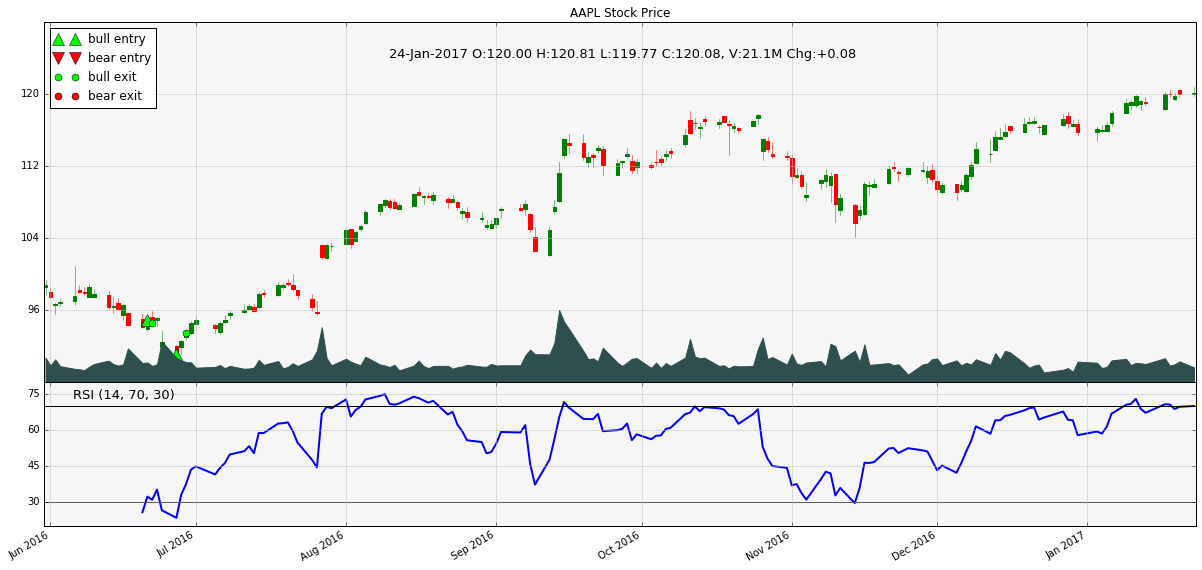

In [12]:
# Spec: And have the following 2 charts
#    - Stock chart with each bullish and bearish trade entry and exit points


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# Plot the indicator
ax3.plot(ticker["NumDate"], ticker["RSI"], color='blue', lw=2) 
ax3.axhline(y=overbought_level, color='black', lw=1)
ax3.axhline(y=oversold_level, color='black', lw=1)

ax3.text(0.025, 0.95, 'RSI (%d, %d, %d)' % (n, overbought_level, oversold_level), va='top',
         transform=ax3.transAxes, fontsize=textsize)

# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

bull_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bull"].set_index("Entry_Date")
bear_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bear"].set_index("Entry_Date")

bull_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bull"].set_index("Exit_Date")
bear_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bear"].set_index("Exit_Date")

ax2.plot(bull_entry.index, bull_entry.values, '^', color='lime', markersize=12,
                   label='bull entry')
ax2.plot(bear_entry.index, bear_entry.values, 'v', color='red', markersize=12,
                   label='bear entry')
ax2.plot(bull_exit.index, bull_exit.values, 'o', color='lime', markersize=7,
                   label='bull exit')
ax2.plot(bear_exit.index, bear_exit.values, 'o', color='red', markersize=7,
                   label='bear exit')

ax2.legend(loc="best")

plt.show()

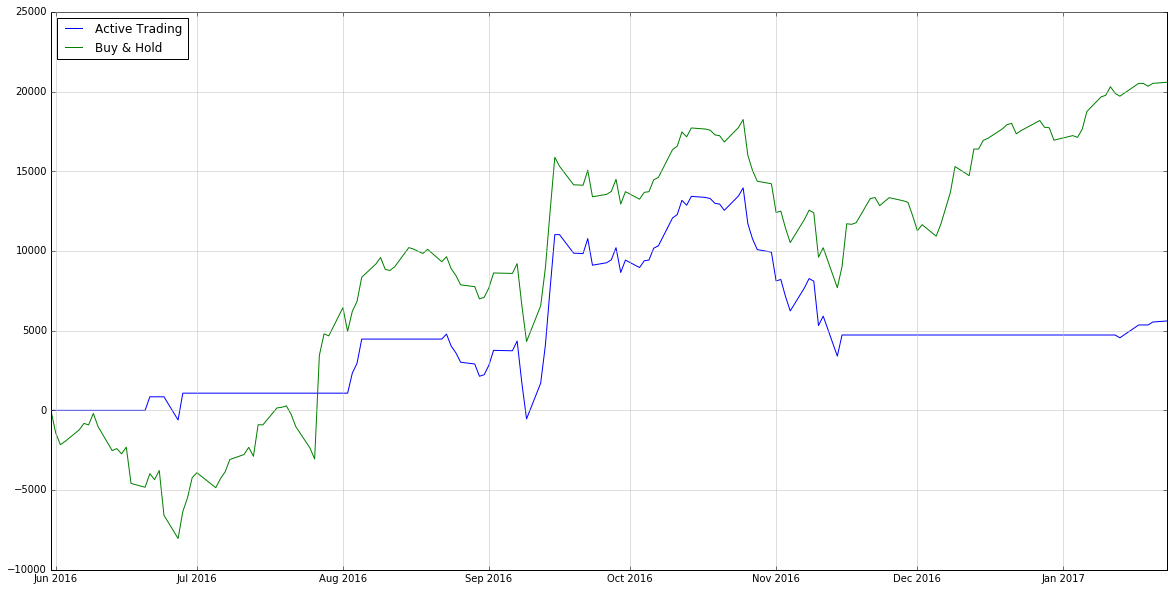

In [13]:
#    - Equity curve for the strategy compared to buy and hold strategy
plt.plot(returns["Portfolio_Value"], label='Active Trading')
plt.plot(returns["Buy_And_Hold"], label='Buy & Hold')
plt.legend(loc="upper left")
plt.show()